In [82]:
%pip install pandas ydata-profiling ipywidgets seaborn pyqt6 lifelines

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('../Dataset/Thyroid_Disease_Data.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [85]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [86]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [87]:
report = ProfileReport(df, title='EDA Report for Thyroid Cancer Recurrence Dataset')
report.to_file(output_file='Profile_Report.html')
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\arpit\Desktop\Thyroid Cancer Recurrence Prediction\env\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'No'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Age Distribution

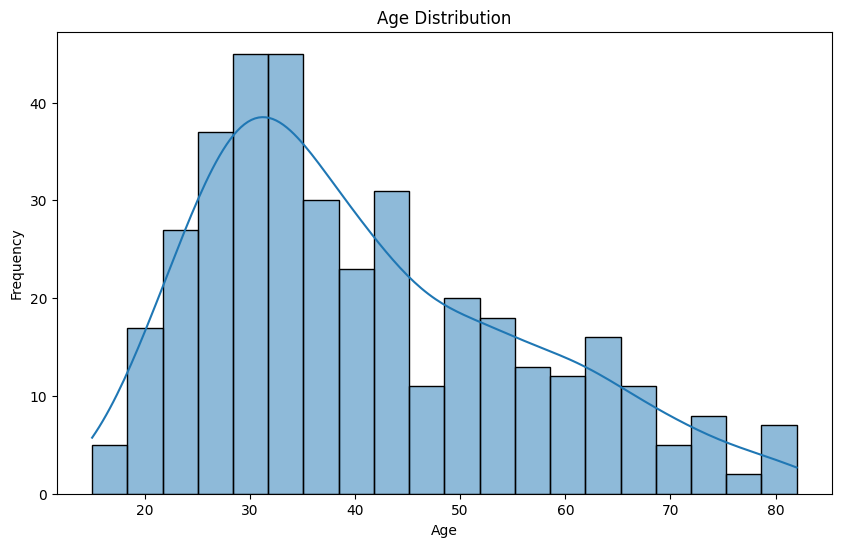

In [88]:
ax = plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

fig = ax.get_figure()
fig.savefig('../Images/Age_Distribution.png')

#### Gender Distribution

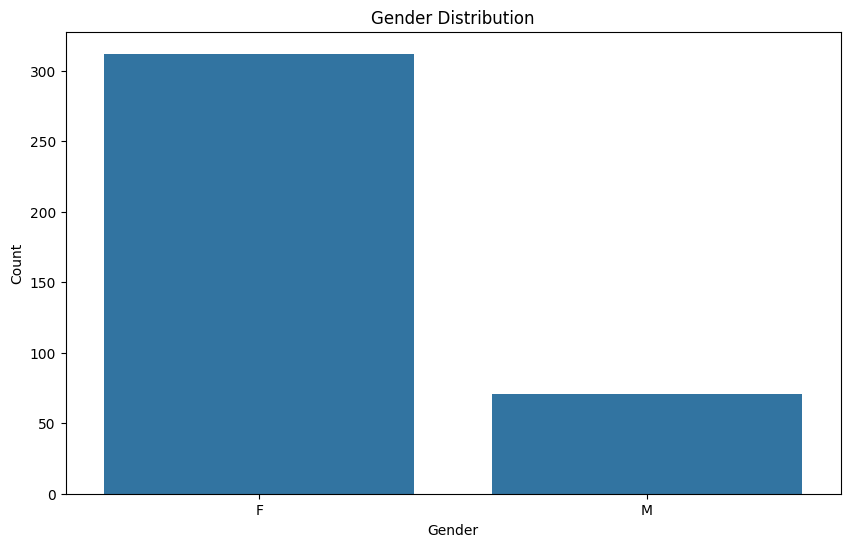

In [89]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

fig = ax.get_figure()
fig.savefig('../Images/Gender_Distribution.png')

#### Age Distribution by Smoking Status

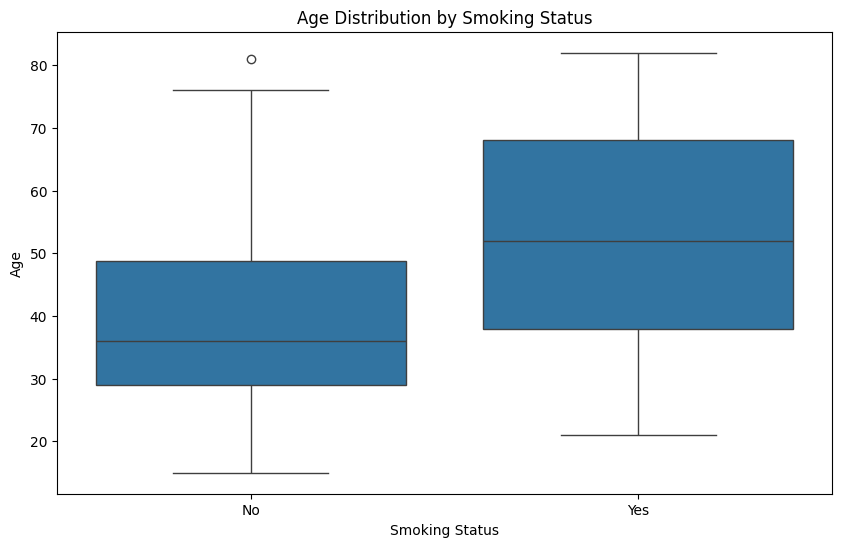

In [90]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Smoking', y='Age', data=df)
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.savefig('../Images/Age_Distribution_by_Smoking_Status.png')
plt.show()

### Correlation Matrix

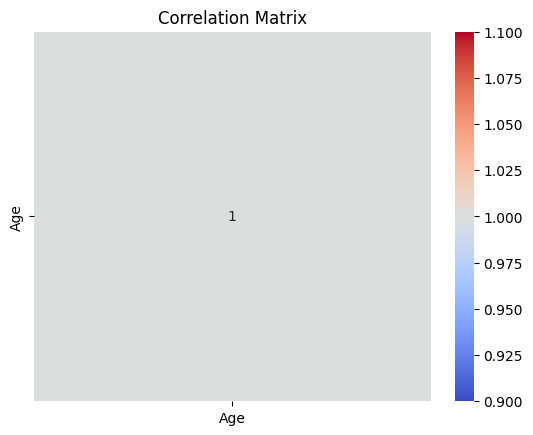

In [91]:
corr_matrix = df.corr(numeric_only=True)
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

fig = ax.get_figure()
fig.savefig('../Images/Correlation_Matrix.png')

#### Adenopathy Distribution

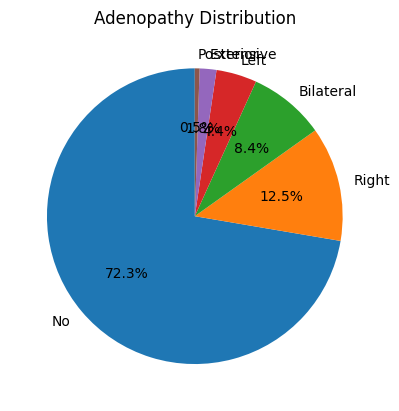

In [92]:
ax = df['Adenopathy'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Adenopathy Distribution')
plt.ylabel('')  # To remove the y-axis label
plt.show()

fig = ax.get_figure()
fig.savefig('../Images/Adenopathy_Distribution.png')

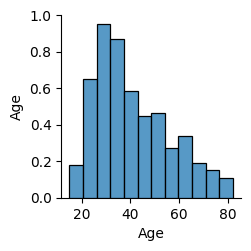

In [93]:
fig = sns.pairplot(df[['Age', 'T', 'N', 'M', 'Thyroid Function']])
plt.show()
fig.savefig('../Images/Thyroid_Cancer_Recurrence_Dataset_EDA.png')

C:\Users\arpit\AppData\Local\Temp\ipykernel_7492\2860901793.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


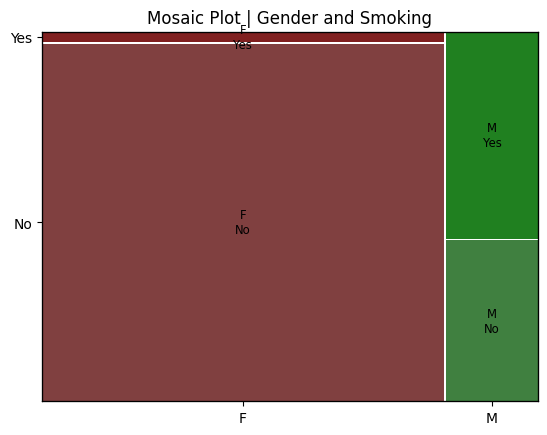

In [94]:
from statsmodels.graphics.mosaicplot import mosaic

fig, ax = mosaic(df, ['Gender', 'Smoking'])
plt.title('Mosaic Plot | Gender and Smoking')
fig.show()
fig.savefig('../Images/MosaicPlot.png', bbox_inches='tight')